In [84]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [85]:
# lets define a function to calculate the range. The range is the difference between the maximum and minimum values.
def range_f(column):
    return column.max() - column.min()



In [86]:
# Read in the data from the csv file with Pandas
# Some Data and Data cleaning Occured before import.
new_payroll_df = pd.read_csv('data/2022_Hartford.csv')
new_payroll_df.dropna(inplace=True)


# Data Citation
# --------------------------------
# State Employee Payroll Data Calendar Year 2015 through Present | Connecticut Data. (n.d.). Retrieved November 18, 2023, from https://data.ct.gov/Government/State-Employee-Payroll-Data-Calendar-Year-2015-thr/virr-yb6n
# License: Public Domain

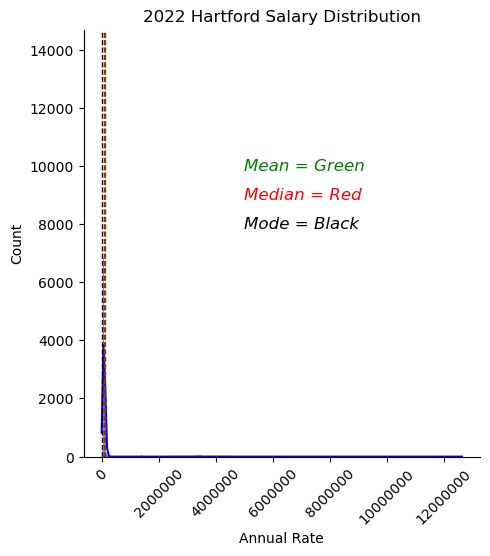

<Figure size 1000x600 with 0 Axes>

In [91]:
# Visualize the distribution of the Annual Rate column

#pd.options.display.float_format = '{:.2f}'.format
ax=sns.displot(new_payroll_df, x='Annual Rate', kde=True, color='blue')
plt.axvline(new_payroll_df['Annual Rate'].mean(), color='green', linestyle='dashed', linewidth=1)
mode = new_payroll_df['Annual Rate'].mode()
plt.xticks(rotation=45)                                                               
plt.axvline(mode[0], color='Black', linestyle='dashed', linewidth=1)
plt.axvline(new_payroll_df['Annual Rate'].median(), color='red', linestyle='dashed', linewidth=1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.title('2022 Hartford Salary Distribution')



plt.text(5000000, 10000, "Mean = Green", 
       fontsize = 12,          # Size
       fontstyle = "oblique",  # Style
       color = "green",          # Color
       ha = "left", # Horizontal alignment
       va = "center") # Vertical alignment

plt.text(5000000, 9000, "Median = Red", 
       fontsize = 12,          # Size
       fontstyle = "oblique",  # Style
       color = "red",          # Color
       ha = "left", # Horizontal alignment
       va = "center") # Vertical alignment

plt.text(5000000, 8000, "Mode = Black", 
       fontsize = 12,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "left", # Horizontal alignment
       va = "center") # Vertical alignment

plt.figure(figsize=(10, 6))

plt.show()

In [88]:
display(new_payroll_df_large.sort_values(by='Annual Rate', ascending=False).head(5))

,Calendar Year,City,Annual Rate
294400,2022,Hartford,12634884.72
471179,2022,Hartford,12557127.60
361473,2022,Hartford,12557127.60
461128,2022,Hartford,12557127.60
379143,2022,Hartford,12557127.60


/var/folders/tq/t8mtqv314lg2510yzpslscmw0000gn/T/ipykernel_78181/4215976191.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.displot(new_payroll_df_small, x='Annual Rate', bins=20, kde=True, color='blue', alpha=0.2, palette='mako')


<Figure size 1000x600 with 0 Axes>

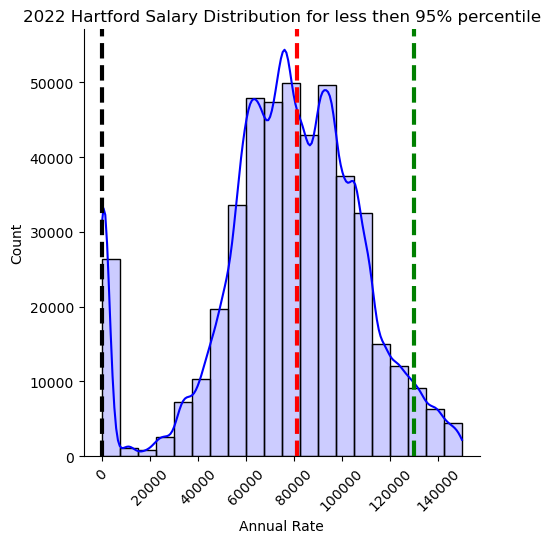

<Figure size 1000x600 with 0 Axes>

In [89]:
new_payroll_df_small=(new_payroll_df[new_payroll_df['Annual Rate'] < new_payroll_df['Annual Rate'].quantile(0.95)])
plt.figure(figsize=(10, 6))
pd.options.display.float_format = '{:.2f}'.format
ax=sns.displot(new_payroll_df_small, x='Annual Rate', bins=20, kde=True, color='blue', alpha=0.2, palette='mako')
plt.axvline(new_payroll_df['Annual Rate'].mean(), color='green', linestyle='dashed', linewidth=3)
mode = new_payroll_df_small['Annual Rate'].mode()
plt.xticks(rotation=45)                                                               
plt.axvline(mode[0], color='Black', linestyle='dashed', linewidth=3)
plt.axvline(new_payroll_df['Annual Rate'].median(), color='red', linestyle='dashed', linewidth=3)
plt.title('2022 Hartford Salary Distribution for less then 95% percentile')

plt.figure(figsize=(10, 6))


plt.show()

In [90]:
print("Central Tendancies for all Hardford Salaries")
print("================================================")
new_payroll_df_desc=new_payroll_df['Annual Rate'].agg(['mean','median','min','max',range_f])
new_payroll_df_desc["mode"] = new_payroll_df['Annual Rate'].mode()[0]
display(new_payroll_df_desc)


print("Central Tendancies for all Hardford Salaries, up to 95% percentile")
print("================================================")
new_payroll_df_small=(new_payroll_df[new_payroll_df['Annual Rate'] < new_payroll_df['Annual Rate'].quantile(0.95)])

newdescribe_df = new_payroll_df_small['Annual Rate'].agg(['mean','median','min','max',range_f])
newdescribe_df["mode"] = new_payroll_df_small['Annual Rate'].mode()[0]
display(newdescribe_df)

Central Tendancies for all Hardford Salaries


mean        130117.01
median       81312.20
min              0.00
max       12634884.72
range_f   12634884.72
mode             0.00
Name: Annual Rate, dtype: float64

Central Tendancies for all Hardford Salaries, up to 95% percentile


mean       78083.82
median     79312.16
min            0.00
max       149974.52
range_f   149974.52
mode           0.00
Name: Annual Rate, dtype: float64